In [43]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import altair as alt

In [44]:
boston = load_boston()
print(boston.keys()) 

print(boston.data.shape) 

print(boston.feature_names)

print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [45]:
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names
print(bos_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [46]:
bos_df['PRICE'] = boston.target
print(bos_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [47]:
print(bos_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

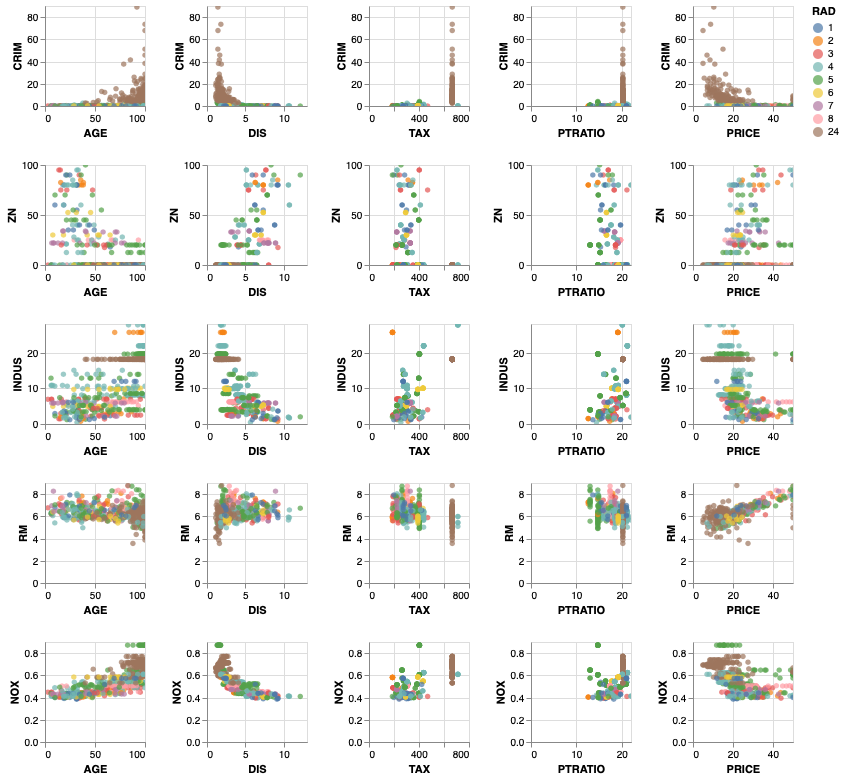

In [28]:
source = bos_df

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='RAD:N'
).properties(
    width=100,
    height=100
).repeat(
    row=['CRIM', 'ZN', 'INDUS', 'RM', 'NOX'],
    column=['AGE', 'DIS', 'TAX', 'PTRATIO','PRICE']
).interactive()

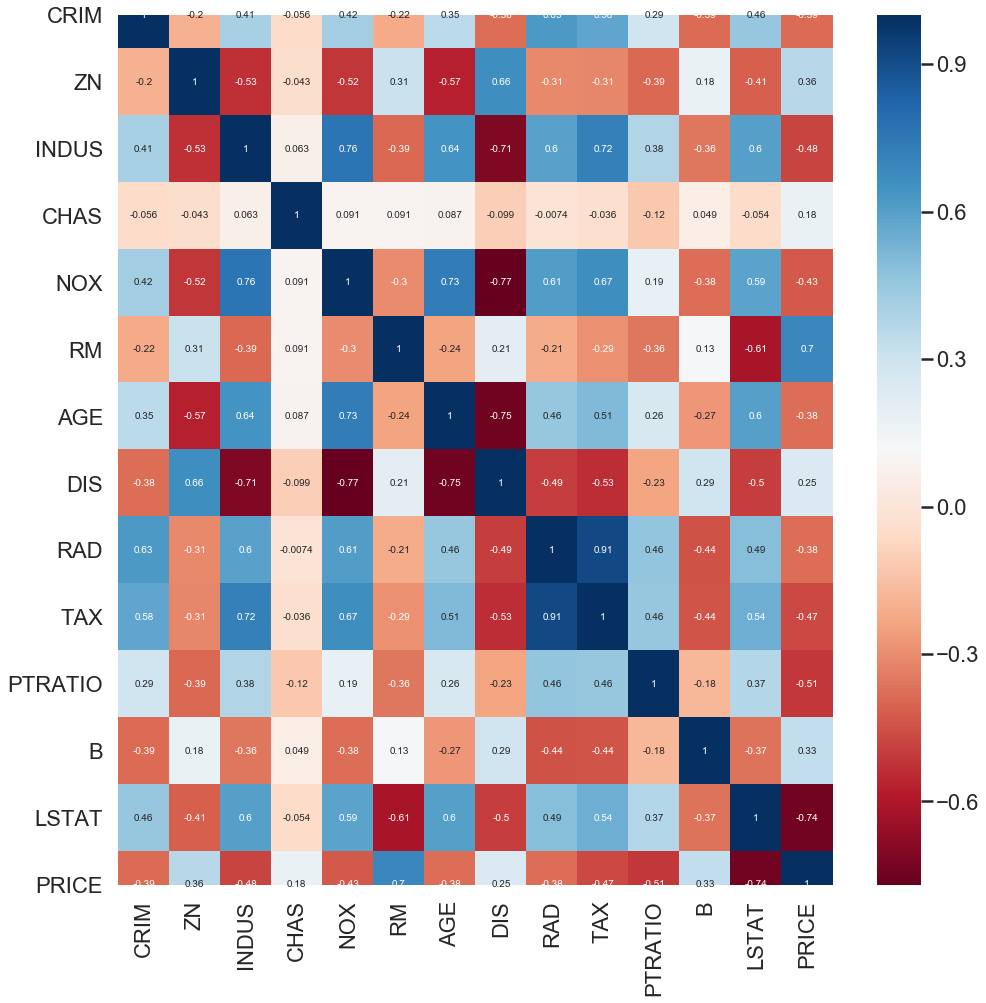

In [37]:
ax, fig = plt.subplots(figsize = (16,16))
sns.heatmap(bos_df.corr(), annot=True, cmap = 'RdBu') 
plt.show()

In [40]:
print('DataFrame Null values:' , bos_df.isnull().values.ravel().sum())
print('Number of unique classes:\n',bos_df.nunique())

DataFrame Null values: 0
Number of unique classes:
 CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64


In [53]:
def normal_equation(x,y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T),y)

features = ['LSTAT', 'RM']
X_b = np.c_[np.ones((len(bos_df[features]),1)), bos_df[features].values] #X matrix
X_b.shape

(506, 3)

In [111]:
from sklearn.model_selection import train_test_split

#test-train - X = All other features & Y = Boston Housing Price

X = bos_df.drop('PRICE', axis = 1)
Y = bos_df['PRICE']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_b, Y, test_size = 0.20, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 3)
(102, 3)
(404,)
(102,)


In [112]:
theta1 = normal_equation(X_train1, Y_train1)
theta1

array([ 3.14487154, -0.68480439,  4.43045078])

In [113]:
pred1 = np.dot(X_train1, theta1)

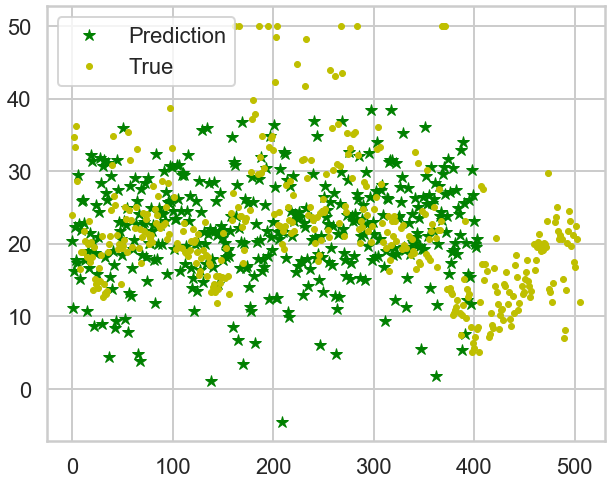

In [114]:
ax, fig = plt.subplots(figsize = (10,8))
plt.plot(pred1, 'g.', marker = '*')
plt.plot(Y_train1, 'y.')
plt.legend(['Prediction', 'True'])
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error
mse_train = sklearn.metrics.mean_squared_error(pred1, Y_train1)
print(mse_train)

27.987941185479475


In [116]:
test_pred1 = np.dot(X_test1, theta1)

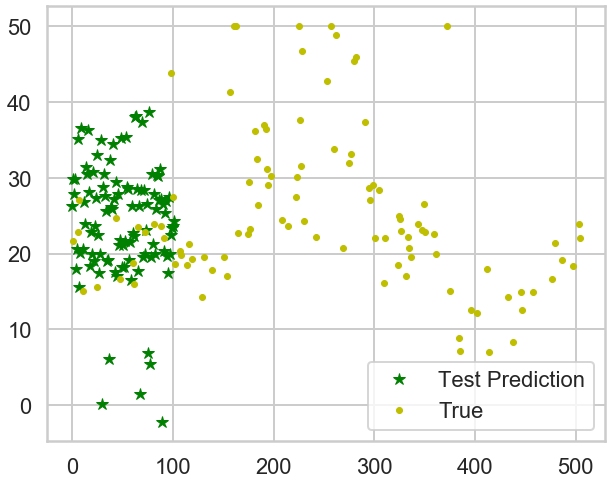

In [117]:
ax, fig = plt.subplots(figsize = (10,8))
plt.plot(test_pred1, 'g.', marker = '*')
plt.plot(Y_test1, 'y.')
plt.legend(['Test Prediction', 'True'])
plt.show()

In [118]:
mse_test = sklearn.metrics.mean_squared_error(test_pred1, Y_test1)
print(mse_test)

41.40202341152446


In [119]:
lm = LinearRegression()
lm.fit(X_train1, Y_train1)

Y_pred1 = lm.predict(X_test1)

In [120]:
mse = sklearn.metrics.mean_squared_error(Y_test1, Y_pred1)
print(mse)

41.402023411523814


In [83]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.30, random_state = 10)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.55, random_state = 25)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.15, random_state = 50)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.05, random_state = 50)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

#X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.01, random_state = 50)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

(102,)
